## Name : Aayush Adeshara
### Task-2 : Prediction using Unsupervised ML

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [319]:
iris = pd.read_csv(r'/home/aayush/Downloads/Iris.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [320]:
x = iris.iloc[:, 1:-1].values

In [321]:
from sklearn.cluster import KMeans

## Finding sum of squared errors

In [322]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters = i)
    km.fit(x)
    sse.append(km.inertia_)

## Plotting Elbow graph

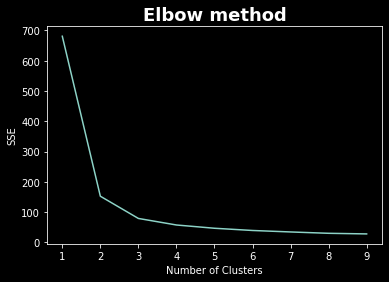

In [359]:
with plt.style.context('dark_background'):
    plt.plot(range(1, 10), sse)
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow method', fontdict={'weight' : 'bold', 'size' : 18})
plt.show()

## From the above figure it is clear that total number of clusters is "3"

In [354]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x) 

In [355]:
iris['Cluster'] = y_predicted
iris_1 = iris[iris['Cluster'] == 0]
iris_2 = iris[iris['Cluster'] == 1]
iris_3 = iris[iris['Cluster'] == 2]

## Below is the representation of the clusters with their respective centroids

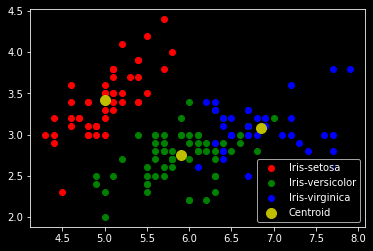

In [356]:
with plt.style.context('dark_background'):
    plt.scatter(iris_1['SepalLengthCm'], iris_1['SepalWidthCm'], label='Iris-setosa', color='r')
    plt.scatter(iris_2['SepalLengthCm'], iris_2['SepalWidthCm'], label='Iris-versicolor', color='g')
    plt.scatter(iris_3['SepalLengthCm'], iris_3['SepalWidthCm'], label='Iris-virginica', color='b')

    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroid', s = 100, color = 'y')

    plt.legend()
plt.show()